In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
import re

In [71]:
social_df = pd.read_excel('data/social_data_msoa.xlsx', sheet_name='iadatasheet1', header=[0,1,2])
social_df.head()

Unnamed: 0_level_0        Unnamed: 1_level_0 Age Structure (2011 Census)  \
  Unnamed: 0_level_1        Unnamed: 1_level_1                    All Ages   
           MSOA Code                 MSOA Name          Unnamed: 2_level_2   
0          E02000001        City of London 001                      7375.0   
1          E02000002  Barking and Dagenham 001                      6775.0   
2          E02000003  Barking and Dagenham 002                     10045.0   
3          E02000004  Barking and Dagenham 003                      6182.0   
4          E02000005  Barking and Dagenham 004                      8562.0   

                                                                               \
                0-15              16-29              30-44              45-64   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0              620.0             1665.0             2045.0             2010.0   
1             1751.0             1277.0             1388.0             1258.0   
2             2247.0             1959.0             2300.0             2259.0   
3             1196.0             1277.0             1154.0             1543.0   
4             2200.0             1592.0             1995.0             1829.0   

                                        Mid-year Estimate totals  ...  \
                 65+        Working-age                 All Ages  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2                     2002  ...   
0             1035.0             5720.0                   7280.0  ...   
1             1101.0             3923.0                   6333.0  ...   
2             1280.0             6518.0                   9236.0  ...   
3             1012.0             3974.0                   6208.0  ...   
4              946.0             5416.0                   7919.0  ...   

  Road Casualties                                                           \
             2010             2011                            2012           
           Slight 2010 Total Fatal Serious Slight 2011 Total Fatal Serious   
0           334.0      374.0   0.0    46.0  359.0      405.0   2.0    51.0   
1            18.0       18.0   0.0     2.0   16.0       18.0   0.0     1.0   
2            34.0       37.0   1.0     4.0   40.0       45.0   0.0     3.0   
3            13.0       14.0   0.0     2.0    7.0        9.0   0.0     2.0   
4            24.0       30.0   0.0     2.0   27.0       29.0   0.0     1.0   

                     
                     
  Slight 2012 Total  
0  361.0      414.0  
1   15.0       16.0  
2   47.0       50.0  
3    5.0        7.0  
4   24.0       25.0  

[5 rows x 207 columns]

In [72]:
# 2. Flatten the multi-index columns: join the main and subcategory names, excluding "Unnamed" parts
social_df.columns = [
    "_".join(filter(None, map(str.strip, map(str, col)))) if isinstance(col, tuple) else str(col).strip()
    for col in social_df.columns
]
social_df.columns = [re.sub(r'_Unnamed.*$', '', col) for col in social_df.columns]

# 3. Drop any fully empty rows (common with Excel)
social_df.dropna(how='all', inplace=True)

# 4. (Optional) Reset index if needed
social_df.reset_index(drop=True, inplace=True)

In [73]:
# name the first column 'MSOA_code' and second column 'MSOA_name'
social_df.rename(columns={social_df.columns[0]: 'MSOA_code', social_df.columns[1]: 'MSOA_name'}, inplace=True)
# delete first row
social_df.drop(index=0, inplace=True)

In [74]:
# print name of all columns
print(social_df.columns)

Index(['MSOA_code', 'MSOA_name', 'Age Structure (2011 Census)_All Ages',
       'Age Structure (2011 Census)_0-15', 'Age Structure (2011 Census)_16-29',
       'Age Structure (2011 Census)_30-44',
       'Age Structure (2011 Census)_45-64', 'Age Structure (2011 Census)_65+',
       'Age Structure (2011 Census)_Working-age',
       'Mid-year Estimate totals_All Ages_2002',
       ...
       'Road Casualties_2010_Slight', 'Road Casualties_2010_2010 Total',
       'Road Casualties_2011_Fatal', 'Road Casualties_2011_Serious',
       'Road Casualties_2011_Slight', 'Road Casualties_2011_2011 Total',
       'Road Casualties_2012_Fatal', 'Road Casualties_2012_Serious',
       'Road Casualties_2012_Slight', 'Road Casualties_2012_2012 Total'],
      dtype='object', length=207)


In [75]:
# name the first column 'MSOA'
social_df.rename(columns={social_df.columns[0]: 'MSOA'}, inplace=True)

In [76]:
# print how many distinct values in the 'MSOA' column
print(f"Distinct MSOAs: {social_df['MSOA'].nunique()}")

Distinct MSOAs: 982


In [77]:
gdf1 = gpd.read_file('msoa2021/Barking and Dagenham.shp')
gdf2 = gpd.read_file('msoa2021/Barnet.shp')
gdf3 = gpd.read_file('msoa2021/Bexley.shp')
gdf4 = gpd.read_file('msoa2021/Brent.shp')
gdf5 = gpd.read_file('msoa2021/Bromley.shp')
gdf6 = gpd.read_file('msoa2021/Camden.shp')
gdf7 = gpd.read_file('msoa2021/Croydon.shp')
gdf8 = gpd.read_file('msoa2021/City of London.shp')
gdf9 = gpd.read_file('msoa2021/Ealing.shp')
gdf10 = gpd.read_file('msoa2021/Enfield.shp')
gdf11 = gpd.read_file('msoa2021/Greenwich.shp')
gdf12 = gpd.read_file('msoa2021/Hackney.shp')
gdf13 = gpd.read_file('msoa2021/Hammersmith and Fulham.shp')
gdf14 = gpd.read_file('msoa2021/Haringey.shp')
gdf15 = gpd.read_file('msoa2021/Harrow.shp')
gdf16 = gpd.read_file('msoa2021/Havering.shp')
gdf17 = gpd.read_file('msoa2021/Hillingdon.shp')
gdf18 = gpd.read_file('msoa2021/Hounslow.shp')
gdf19 = gpd.read_file('msoa2021/Islington.shp')
gdf20 = gpd.read_file('msoa2021/Kensington and Chelsea.shp')
gdf21 = gpd.read_file('msoa2021/Kingston upon Thames.shp')
gdf22 = gpd.read_file('msoa2021/Lambeth.shp')
gdf23 = gpd.read_file('msoa2021/Lewisham.shp')
gdf24 = gpd.read_file('msoa2021/Merton.shp')
gdf25 = gpd.read_file('msoa2021/Newham.shp')
gdf26 = gpd.read_file('msoa2021/Redbridge.shp')
gdf27 = gpd.read_file('msoa2021/Richmond upon Thames.shp')
gdf28 = gpd.read_file('msoa2021/Southwark.shp')
gdf29 = gpd.read_file('msoa2021/Sutton.shp')
gdf30 = gpd.read_file('msoa2021/Tower Hamlets.shp')
gdf31 = gpd.read_file('msoa2021/Waltham Forest.shp')
gdf32 = gpd.read_file('msoa2021/Wandsworth.shp')
gdf33 = gpd.read_file('msoa2021/Westminster.shp')

gdf = gpd.GeoDataFrame(pd.concat([gdf1, gdf2, gdf3, gdf4, gdf5, gdf6, gdf7, gdf8, gdf9, gdf10,
                                  gdf11, gdf12, gdf13, gdf14, gdf15, gdf16, gdf17, gdf18, gdf19,
                                 gdf20, gdf21, gdf22, gdf23, gdf24, gdf25, gdf26, gdf27, gdf28,
                                 gdf29, gdf30, gdf31, gdf32, gdf33], ignore_index=True))
gdf.head()

,msoa21cd,msoa21nm,lad22cd,lad22nm,geometry
0,E02000009,Barking and Dagenham 008,E09000002,Barking and Dagenham,"POLYGON ((546799.421 186249.956, 546805.432 18..."
1,E02000012,Barking and Dagenham 011,E09000002,Barking and Dagenham,"POLYGON ((546238.761 185409.344, 546238.943 18..."
2,E02000015,Barking and Dagenham 014,E09000002,Barking and Dagenham,"POLYGON ((549964.554 184818.777, 549966.393 18..."
3,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,"POLYGON ((544113.723 184901.614, 544129.715 18..."
4,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,"POLYGON ((544701.411 185122.589, 544760.577 18..."


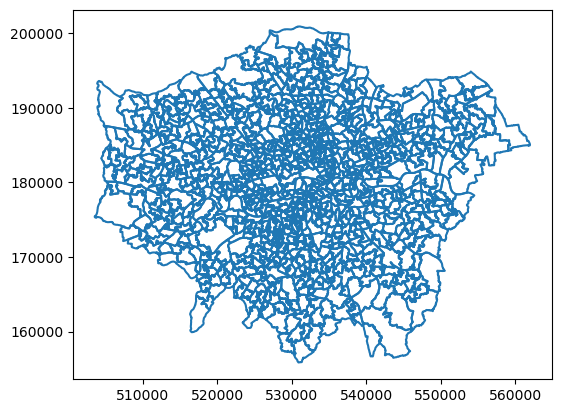

In [78]:
# can you plot the boundaries of the gdf
gdf.boundary.plot()
plt.show()

In [79]:
# can you map the gdf to the social_df by using msoa21cd column in gdf and MSOA column in social_df
total_df = gdf.merge(social_df, left_on='msoa21cd', right_on='MSOA', how='left')
total_df.head()

,msoa21cd,msoa21nm,lad22cd,lad22nm,geometry,MSOA,MSOA_name,Age Structure (2011 Census)_All Ages,Age Structure (2011 Census)_0-15,Age Structure (2011 Census)_16-29,...,Road Casualties_2010_Slight,Road Casualties_2010_2010 Total,Road Casualties_2011_Fatal,Road Casualties_2011_Serious,Road Casualties_2011_Slight,Road Casualties_2011_2011 Total,Road Casualties_2012_Fatal,Road Casualties_2012_Serious,Road Casualties_2012_Slight,Road Casualties_2012_2012 Total
0,E02000009,Barking and Dagenham 008,E09000002,Barking and Dagenham,"POLYGON ((546799.421 186249.956, 546805.432 18...",E02000009,Barking and Dagenham 008,8395.0,2062.0,1753.0,...,24.0,26.0,0.0,4.0,22.0,26.0,0.0,1.0,15.0,16.0
1,E02000012,Barking and Dagenham 011,E09000002,Barking and Dagenham,"POLYGON ((546238.761 185409.344, 546238.943 18...",E02000012,Barking and Dagenham 011,9888.0,2304.0,2206.0,...,26.0,27.0,0.0,1.0,12.0,13.0,0.0,2.0,14.0,16.0
2,E02000015,Barking and Dagenham 014,E09000002,Barking and Dagenham,"POLYGON ((549964.554 184818.777, 549966.393 18...",E02000015,Barking and Dagenham 014,7563.0,1978.0,1600.0,...,11.0,13.0,0.0,1.0,7.0,8.0,0.0,0.0,13.0,13.0
3,E02000016,Barking and Dagenham 015,E09000002,Barking and Dagenham,"POLYGON ((544113.723 184901.614, 544129.715 18...",E02000016,Barking and Dagenham 015,7676.0,2055.0,2253.0,...,35.0,36.0,0.0,0.0,31.0,31.0,0.0,3.0,41.0,44.0
4,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,"POLYGON ((544701.411 185122.589, 544760.577 18...",E02000017,Barking and Dagenham 016,8498.0,1862.0,2255.0,...,23.0,26.0,1.0,2.0,17.0,20.0,0.0,0.0,11.0,11.0


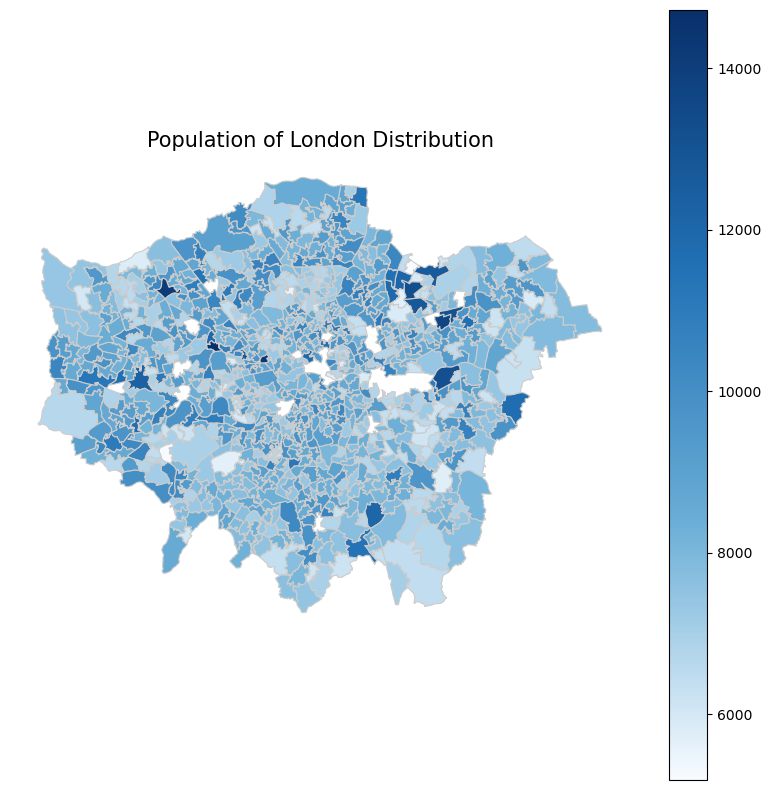

In [80]:
# I want to plt a map that shows the ward i have the boundaries of color coded by the value of the columns Age Structure (2011 Census)_All Ages	Age Structure (2011 Census)_0-15	Age Structure (2011 Census)_16-29 ...
# I want to use the column Age Structure (2011 Census)_All Ages

# 1. Create a custom colormap
# Define the colors you want to use
colors = ['#f7fbff', '#6baed6', '#2171b5', '#08306b'] 
# Create a colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
# 2. Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# 3. Plot the GeoDataFrame with the custom colormap
total_df.plot(column='Age Structure (2011 Census)_All Ages', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# 5. Set the title and show the plot
ax.set_title('Population of London Distribution', fontsize=15)
plt.axis('off')
plt.show()

C:\Users\liaba\AppData\Local\Temp\ipykernel_20752\2649365102.py:27: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  total_df['dominant_religion'] = total_df[religion_columns].idxmax(axis=1)
C:\Users\liaba\AppData\Local\Temp\ipykernel_20752\2649365102.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_df['color'].fillna('#ffffff', inplace=True)


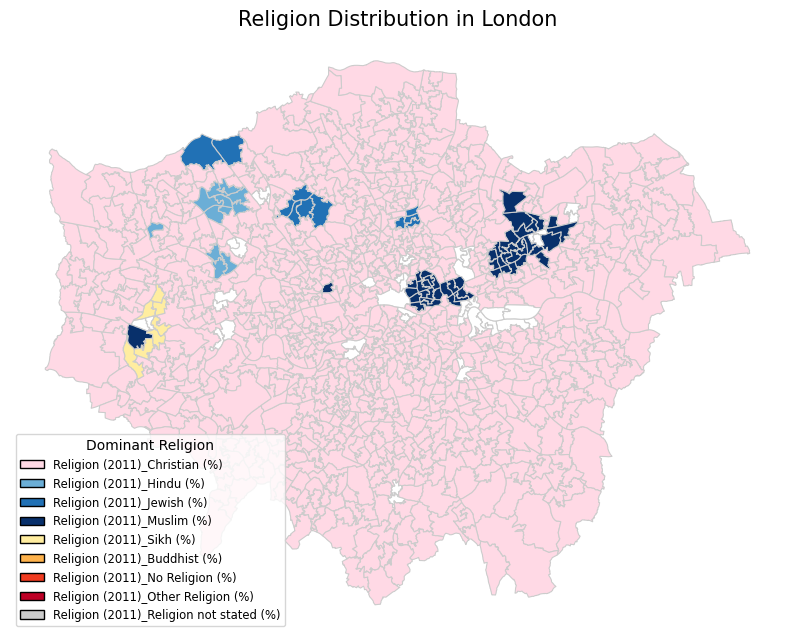

In [84]:
from matplotlib.patches import Patch

# Define the religion_colors dictionary
religion_colors = {
    'Religion (2011)_Christian (%)': '#ffd9e5',
    'Religion (2011)_Hindu (%)': '#6baed6',
    'Religion (2011)_Jewish (%)': '#2171b5',
    'Religion (2011)_Muslim (%)': '#08306b',
    'Religion (2011)_Sikh (%)': '#ffeda0',
    'Religion (2011)_Buddhist (%)': '#feb24c',
    'Religion (2011)_No Religion (%)': '#f03b20',
    'Religion (2011)_Other Religion (%)': '#bd0026',
    'Religion (2011)_Religion not stated (%)': '#cccccc'
}

# 2. Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 3. Add a 'color' column to total_df based on the dominant religion
# Verify if all religion columns exist in total_df
religion_columns = [col for col in religion_colors.keys() if col in total_df.columns]

if not religion_columns:
    raise KeyError("None of the religion columns exist in the DataFrame.")

# Find the religion column with the maximum value for each row
total_df['dominant_religion'] = total_df[religion_columns].idxmax(axis=1)
total_df['color'] = total_df['dominant_religion'].map(religion_colors)

# Assign a default color (e.g., white) for rows with NaN in the 'color' column
total_df['color'].fillna('#ffffff', inplace=True)

# Plot the GeoDataFrame with the color of the dominant religion
total_df.plot(color=total_df['color'], linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# 4. Create a custom legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=religion) 
                   for religion, color in religion_colors.items()]
ax.legend(handles=legend_elements, title="Dominant Religion", loc='lower left', fontsize='small')

# 5. Set the title and show the plot
ax.set_title('Religion Distribution in London', fontsize=15)
plt.axis('off')
plt.show()


C:\Users\liaba\AppData\Local\Temp\ipykernel_20752\488713133.py:24: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  total_df['dominant_ethnicity'] = total_df[ethncity_columns].idxmax(axis=1)
C:\Users\liaba\AppData\Local\Temp\ipykernel_20752\488713133.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_df['color'].fillna('#ffffff', inplace=True)


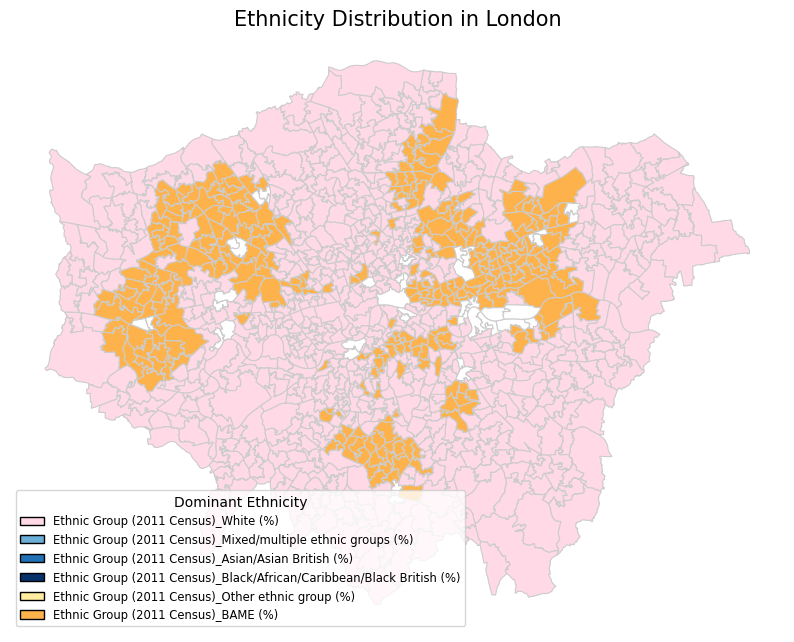

In [86]:
from matplotlib.patches import Patch

# Define the religion_colors dictionary
ethnicity_colors = {
    'Ethnic Group (2011 Census)_White (%)': '#ffd9e5',
    'Ethnic Group (2011 Census)_Mixed/multiple ethnic groups (%)': '#6baed6',
    'Ethnic Group (2011 Census)_Asian/Asian British (%)': '#2171b5',
    'Ethnic Group (2011 Census)_Black/African/Caribbean/Black British (%)': '#08306b',
    'Ethnic Group (2011 Census)_Other ethnic group (%)': '#ffeda0',
    'Ethnic Group (2011 Census)_BAME (%)': '#feb24c',
}

# 2. Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 3. Add a 'color' column to total_df based on the dominant religion
# Verify if all religion columns exist in total_df
ethncity_columns = [col for col in ethnicity_colors.keys() if col in total_df.columns]

if not religion_columns:
    raise KeyError("None of the ethnicity columns exist in the DataFrame.")

# Find the religion column with the maximum value for each row
total_df['dominant_ethnicity'] = total_df[ethncity_columns].idxmax(axis=1)
total_df['color'] = total_df['dominant_ethnicity'].map(ethnicity_colors)

# Assign a default color (e.g., white) for rows with NaN in the 'color' column
total_df['color'].fillna('#ffffff', inplace=True)

# Plot the GeoDataFrame with the color of the dominant religion
total_df.plot(color=total_df['color'], linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# 4. Create a custom legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=ethnicity) 
                   for ethnicity, color in ethnicity_colors.items()]
ax.legend(handles=legend_elements, title="Dominant Ethnicity", loc='lower left', fontsize='small')

# 5. Set the title and show the plot
ax.set_title('Ethnicity Distribution in London', fontsize=15)
plt.axis('off')
plt.show()


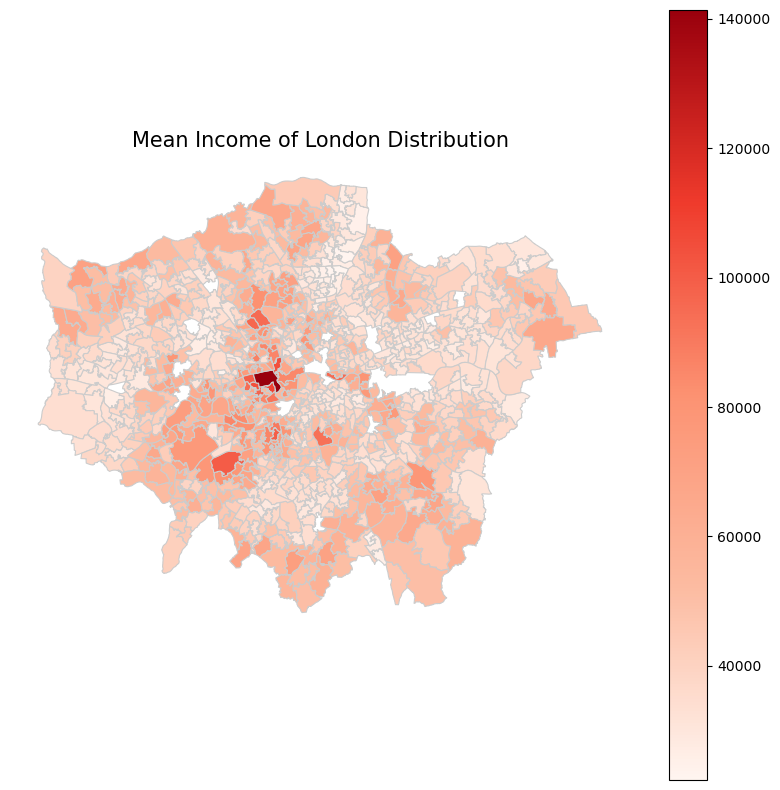

In [88]:
# 1. Create a custom colormap
# Define the colors you want to use
colors = ['#fff5f0', '#fcbba1', '#fc9272', '#ef3b2c', '#99000d']
# Create a colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
# 2. Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# 3. Plot the GeoDataFrame with the custom colormap
total_df.plot(column='Household Income Estimates (2011/12)_Total Mean Annual Household Income (£)', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# 5. Set the title and show the plot
ax.set_title('Mean Income of London Distribution', fontsize=15)
plt.axis('off')
plt.show()